## Final Project Submission

Please fill out:
* Student name: Biwott Gideon
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Samwel Jane
* Blog post URL:


    SELECTED DATASET
The selected dataset is named "Title Basics" which is a movie productions dataset for analysing movies performance. A related dataset is named "Movie Ratings" This file shades more light on Genres performance, in terms of overall ratings and the votes.

-The two datasets are available to the public

https://www.boxofficemojo.com/genre/?ref_=bo_lnav_hm_shrt
https://www.the-numbers.com/market/genres

-The main datset is the "Title Basics", it will be enriched by the "Movie Ratings" using the "tconst" column which is common in both.

The "Title Basics" dataset has over 146144 rows of data and 5 columns.

    PROBLEM STATEMENT
Movie business success is dependant on the consumer behaviour, who mostly watch from interest and this will mean subscription. To attract high subscription rate the Microsoft team will have to understand customer behaviour and what they will likely consume over the other one based on movie production history.

    OBJECTIVES
To explore probable genres correlations based on the overall ratings and the number of votes data.
To establish any limitation to the interpretation of the results and their impact on the data
To establish dominant trends based on categories such as Genres, overarating and number of votes etc. that may be used to leverage profit.
To establish the Correlation and Pattern Discovery for our two Data-sets.
To provide Comprehensive, Communication reporting and actionable Recommendations.


### IMPORTING RELEVANT LIBRARIES FROM PYTHON

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px

### LOADING RAW DATA AND UNDERSTANDING.

In [10]:
Movies_Title = pd.read_csv("title.basics.csv",index_col=0)
Movies_db = pd.read_csv("tmdb.movies.csv",index_col=0)
Movies_Ratings = pd.read_csv("title.ratings.csv",index_col=0)
Movies_Budgets =pd.read_csv("tn.movie_budgets.csv",index_col=0)


In [11]:
Movies_Title.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [12]:
Movies_Ratings.head(3)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20


### Checking the shape of the dataset

In [13]:
Movies_Ratings.shape

(73856, 2)

In [14]:
Movies_Title.shape

(146144, 5)

In [15]:
Movies_Title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [16]:
Movies_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [17]:
#Movies_Gross = pd.read_csv("bom.movie_gross.csv",index_col=0)

In [18]:
#Movies_Gross.head()

### SUB-SETTING THE DATABASE AND JOINING THE DATA SETS

In [19]:
# using merge function by setting how='inner' 
Title_ratings = pd.merge(Movies_Title, Movies_Ratings,  
                   on='tconst',  
                   how='outer')  
Title_ratings.head()


,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


### UNDERSTANDING THE NEW DATA SET

In [20]:
Title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


In [21]:
Title_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


### CHECKING ON THE NUMBERS BASED ON PRODUCTIONS

In [150]:
Production_per_Genres=Title_ratings['genres'].value_counts()
Production_per_Genres

Documentary                     32185
Drama                           21486
Comedy                           9177
Horror                           4372
Comedy,Drama                     3519
                                ...  
Documentary,Music,Reality-TV        1
Biography,Music,Romance             1
Adventure,Fantasy,War               1
Adventure,Romance,Sport             1
Family,Horror,Romance               1
Name: genres, Length: 1085, dtype: int64

In [151]:
#Sorting the data in a descending order based on the genres produced - the first 10
Top10_Production_Genres = Production_per_Genres.sort_values(ascending=False).head(10)
Top10_Production_Genres

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [152]:
#Sorting the data in a descending order based on the genres produced - the last 10
Last10_Production_Genres = Production_per_Genres.sort_values(ascending=False).tail(10)
Last10_Production_Genres

Animation,Mystery              1
Biography,History,Musical      1
Musical,Romance,Sport          1
Horror,Music,Mystery           1
Drama,Horror,Short             1
History,Musical,Romance        1
Documentary,Mystery,Romance    1
Documentary,Horror,Romance     1
Crime,Western                  1
Family,Horror,Romance          1
Name: genres, dtype: int64

## FEATURE ENGINEERING

In [153]:
#Checking on the relationship between genres and averagerating.
Genres_Ratings = Title_ratings.set_index(
    ["genres", "averagerating"])
Genres_Ratings

,,primary_title,original_title,start_year,runtime_minutes,numvotes
genres,averagerating,,,,,
"Action,Crime,Drama",7.0,Sunghursh,Sunghursh,2013,175.0,77.0
"Biography,Drama",7.2,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,43.0
Drama,6.9,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,4517.0
"Comedy,Drama",6.1,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,13.0
"Comedy,Drama,Fantasy",6.5,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,119.0
...,...,...,...,...,...,...
Drama,NaN,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,NaN
Documentary,NaN,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,NaN
Comedy,NaN,Dankyavar Danka,Dankyavar Danka,2013,NaN,NaN


In [154]:
# Start_years = Title_ratings['start_year'].value_counts(100)
# Start_years

## USING GROUPBY FUNCTION TO UNDERSTAND DATA.

In [155]:
#Using Groupby function to check on genres bases in average rating.
Agrregated_Ratings = Title_ratings[['genres','averagerating']].groupby(['genres']).agg(['count', 'median', 'mean'])
Agrregated_Ratings.head(2)

averagerating                 
                            count median      mean
genres                                            
Action                        979   5.80  5.757712
Action,Adult,Comedy             2   4.65  4.650000

In [156]:
#Using Groupby function to check on genres bases in number of votes.
Aggregated_NumeberVote = Title_ratings[['genres','numvotes']].groupby(['genres']).agg(['count', 'median', 'mean'])
Aggregated_NumeberVote.head(2)

numvotes                   
                       count median        mean
genres                                         
Action                   979   32.0  336.115424
Action,Adult,Comedy        2   18.0   18.000000

In [157]:
#Sorting the Aggregated_NumeberVote and getting the first 10.
Title_ratings.groupby(['genres'])['numvotes'].sum().sort_values(ascending=False).head(10)

genres
Action,Adventure,Sci-Fi       23023248.0
Action,Adventure,Fantasy       9658883.0
Adventure,Animation,Comedy     8687435.0
Drama                          8395521.0
Comedy,Drama,Romance           7665463.0
Action,Adventure,Comedy        7256686.0
Comedy                         6832037.0
Comedy,Drama                   6462839.0
Action,Crime,Drama             5563553.0
Drama,Romance                  5542760.0
Name: numvotes, dtype: float64

In [158]:
#Getting the first 10 Genres based on number of votes.
Top_10_Genres_Votes = Title_ratings.groupby(['genres'])['numvotes'].mean().sort_values(ascending=False).head(10)
Top_10_Genres_Votes

genres
Action,Adventure,Sci-Fi      181285.417323
Adventure,Mystery,Sci-Fi     135042.500000
Action,Fantasy,War           131509.000000
Adventure,Drama,Sci-Fi        99316.950000
Action,Adventure,Fantasy      93775.563107
Biography,Drama,Thriller      84506.909091
Action,Crime,Sci-Fi           78214.125000
Action,Adventure,Thriller     74964.800000
Action,Adventure,Mystery      66149.272727
Family,Fantasy,Musical        59606.500000
Name: numvotes, dtype: float64

In [159]:
#Getting the first 10 Genres based on number of Ratings.
Top_10_Genres_Ratings = Title_ratings.groupby(['genres'])['averagerating'].mean().sort_values(ascending=False).head(10)
Top_10_Genres_Ratings

genres
Comedy,Documentary,Fantasy     9.4
Documentary,Family,Musical     9.3
History,Sport                  9.2
Game-Show                      9.0
Music,Mystery                  9.0
Documentary,News,Sport         8.8
Drama,Fantasy,War              8.8
Comedy,Drama,Reality-TV        8.8
Drama,Short                    8.8
Documentary,News,Reality-TV    8.8
Name: averagerating, dtype: float64

In [160]:
#Getting the first 10 Genres based on number of Runtime(minutes).
Runtime_votes = Title_ratings.groupby(['genres'])['runtime_minutes'].mean().sort_values(ascending=False).head(10)
Runtime_votes

genres
Drama,Western                225.342105
Biography,Mystery,Sci-Fi     220.000000
History,Musical,Romance      174.000000
Action,Musical,Romance       170.000000
Musical,Romance,Thriller     165.000000
Fantasy,Sci-Fi               157.736842
Comedy,History               157.055556
Adventure,Animation,Crime    157.000000
Adventure,Horror,Romance     145.000000
Action,Family,Thriller       145.000000
Name: runtime_minutes, dtype: float64

## USING PIVOT TABLE TO ORDER & SORT THE DATA SET

In [161]:
#Sorting by Multiple Columns in Descending Order, Runtime and Average Rating.
Title_Ratings_vs_runtime = Title_ratings.pivot_table(index=['genres'], values=['runtime_minutes','averagerating', 'numvotes'], aggfunc='sum')
Title_Ratings_vs_runtime

,averagerating,numvotes,runtime_minutes
genres,,,
Action,5636.8,329057.0,118099.0
"Action,Adult,Comedy",9.3,36.0,71.0
"Action,Adventure",355.2,109011.0,8067.0
"Action,Adventure,Animation",1096.0,3570543.0,15830.0
"Action,Adventure,Biography",148.3,999701.0,2409.0
...,...,...,...
"Thriller,War,Western",0.0,0.0,55.0
"Thriller,Western",28.6,13288.0,190.0
War,288.3,5535.0,5635.0


In [162]:
#Ordering run-time, numvotes and ratings for the genres.
Title_Vs_Runtime = Title_Ratings_vs_runtime.sort_values(by=["averagerating", "runtime_minutes", "numvotes"],ascending=False)[["averagerating", "runtime_minutes","numvotes",]]
Title_Vs_Runtime

,averagerating,runtime_minutes,numvotes
genres,,,
Drama,75411.4,1492224.0,8395521.0
Documentary,75220.9,1842001.0,1785513.0
Comedy,32431.9,598235.0,6832037.0
"Comedy,Drama",16654.9,306810.0,6462839.0
Horror,13017.1,253096.0,1585933.0
...,...,...,...
"Horror,Talk-Show",0.0,0.0,0.0
"Music,Sci-Fi,Thriller",0.0,0.0,0.0
"Music,Sport",0.0,0.0,0.0


In [163]:
#Getting the first 10 of Title_Vs_Runtime
Title_Vs_Runtime_Pivoted1 = Title_Vs_Runtime.head(10)
Title_Vs_Runtime_Pivoted

,averagerating,runtime_minutes,numvotes
genres,,,
"Fantasy,History",0.0,0.0,0.0
"Fantasy,History,Horror",0.0,0.0,0.0
"Fantasy,War",0.0,0.0,0.0
"History,Romance,Thriller",0.0,0.0,0.0
"Horror,Reality-TV,Thriller",0.0,0.0,0.0
"Horror,Talk-Show",0.0,0.0,0.0
"Music,Sci-Fi,Thriller",0.0,0.0,0.0
"Music,Sport",0.0,0.0,0.0
"Musical,Mystery",0.0,0.0,0.0


In [164]:
#Getting the last 10 of Title_Vs_Runtime
Title_Vs_Runtime_Pivoted2 = Title_Vs_Runtime.tail(10)
Title_Vs_Runtime_Pivoted

,averagerating,runtime_minutes,numvotes
genres,,,
"Fantasy,History",0.0,0.0,0.0
"Fantasy,History,Horror",0.0,0.0,0.0
"Fantasy,War",0.0,0.0,0.0
"History,Romance,Thriller",0.0,0.0,0.0
"Horror,Reality-TV,Thriller",0.0,0.0,0.0
"Horror,Talk-Show",0.0,0.0,0.0
"Music,Sci-Fi,Thriller",0.0,0.0,0.0
"Music,Sport",0.0,0.0,0.0
"Musical,Mystery",0.0,0.0,0.0


In [165]:
#numvotes vs runtime_minutes
pivot_ratings = Title_ratings.pivot_table(index=['genres'],values=['numvotes', 'runtime_minutes'],aggfunc={'sum'}).head(10)
pivot_ratings

,numvotes,runtime_minutes
,sum,sum
genres,,
Action,329057.0,118099.0
"Action,Adult,Comedy",36.0,71.0
"Action,Adventure",109011.0,8067.0
"Action,Adventure,Animation",3570543.0,15830.0
"Action,Adventure,Biography",999701.0,2409.0
"Action,Adventure,Comedy",7256686.0,28545.0
"Action,Adventure,Crime",1344328.0,6411.0
"Action,Adventure,Documentary",16936.0,10391.0


In [166]:
#Average rating vs numvotes
Title_Ratings2 = Title_ratings.pivot_table(index=['genres'], values=['averagerating', 'numvotes'], aggfunc='sum')
Title_Ratings2

,averagerating,numvotes
genres,,
Action,5636.8,329057.0
"Action,Adult,Comedy",9.3,36.0
"Action,Adventure",355.2,109011.0
"Action,Adventure,Animation",1096.0,3570543.0
"Action,Adventure,Biography",148.3,999701.0
...,...,...
"Thriller,War,Western",0.0,0.0
"Thriller,Western",28.6,13288.0
War,288.3,5535.0


In [167]:
#Getting the first 10 of Title_Ratings2 based on Ratings
Averagerating_pivot = Title_Ratings2.sort_values(by=['averagerating'], ascending=False).head(10)
Averagerating_pivot

,averagerating,numvotes
genres,,
Drama,75411.4,8395521.0
Documentary,75220.9,1785513.0
Comedy,32431.9,6832037.0
"Comedy,Drama",16654.9,6462839.0
Horror,13017.1,1585933.0
"Drama,Romance",9504.4,5542760.0
Thriller,8870.1,440564.0
"Comedy,Drama,Romance",7601.3,7665463.0
"Comedy,Romance",7225.2,4752398.0


In [168]:
#Getting the first 10 of Title_Ratings2 based on Number of Vores
numvotes_pivot = Title_Ratings2.sort_values(by=['numvotes'], ascending=False).head(10)
numvotes_pivot

,averagerating,numvotes
genres,,
"Action,Adventure,Sci-Fi",718.3,23023248.0
"Action,Adventure,Fantasy",553.3,9658883.0
"Adventure,Animation,Comedy",1412.9,8687435.0
Drama,75411.4,8395521.0
"Comedy,Drama,Romance",7601.3,7665463.0
"Action,Adventure,Comedy",1377.4,7256686.0
Comedy,32431.9,6832037.0
"Comedy,Drama",16654.9,6462839.0
"Action,Crime,Drama",3365.9,5563553.0


### MERGED DATASET VISUALIZATIONS

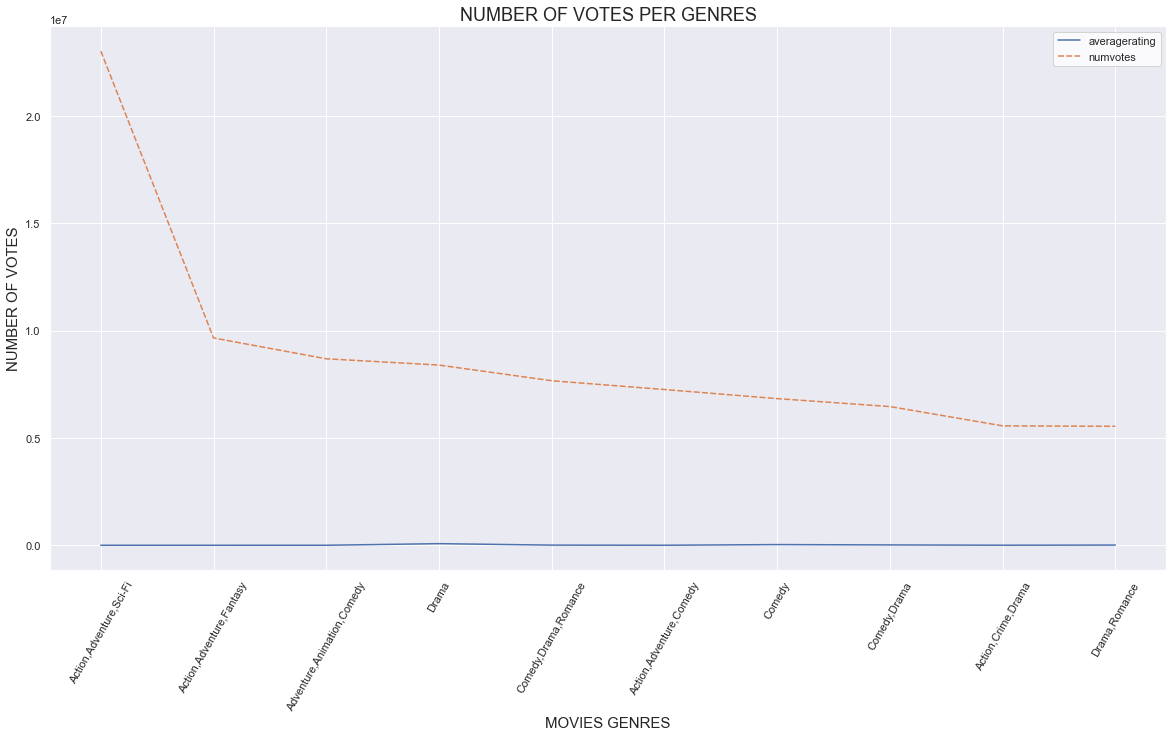

In [169]:
#Visualising Number of Votes against genres
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style='white')
sns.lineplot(data=numvotes_pivot)
plt.xticks(rotation=60)
plt.xlabel('MOVIES GENRES',fontsize=15)
plt.ylabel('NUMBER OF VOTES',fontsize=15)
plt.title('NUMBER OF VOTES PER GENRES',fontsize=18);

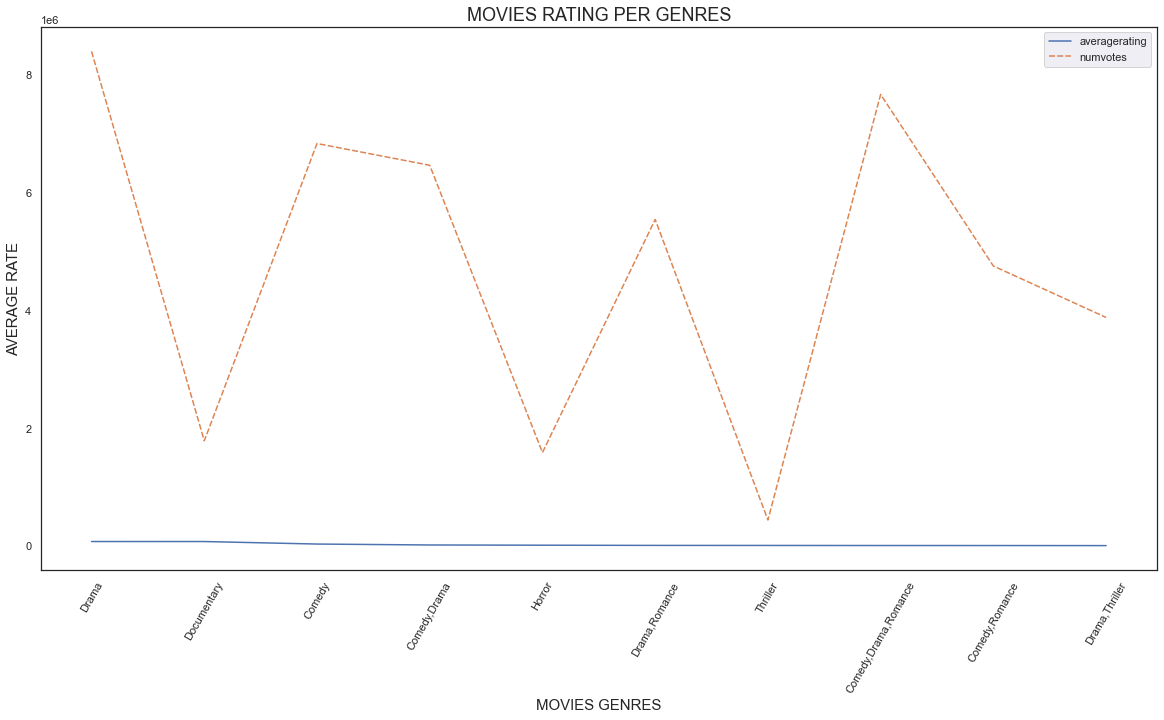

In [170]:
#Visualizing Movies Rating vs Genres
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.lineplot(data=Averagerating_pivot)
plt.xticks(rotation=60)
plt.xlabel('MOVIES GENRES',fontsize=15)
plt.ylabel('AVERAGE RATE',fontsize=15)
plt.title('MOVIES RATING PER GENRES',fontsize=18);

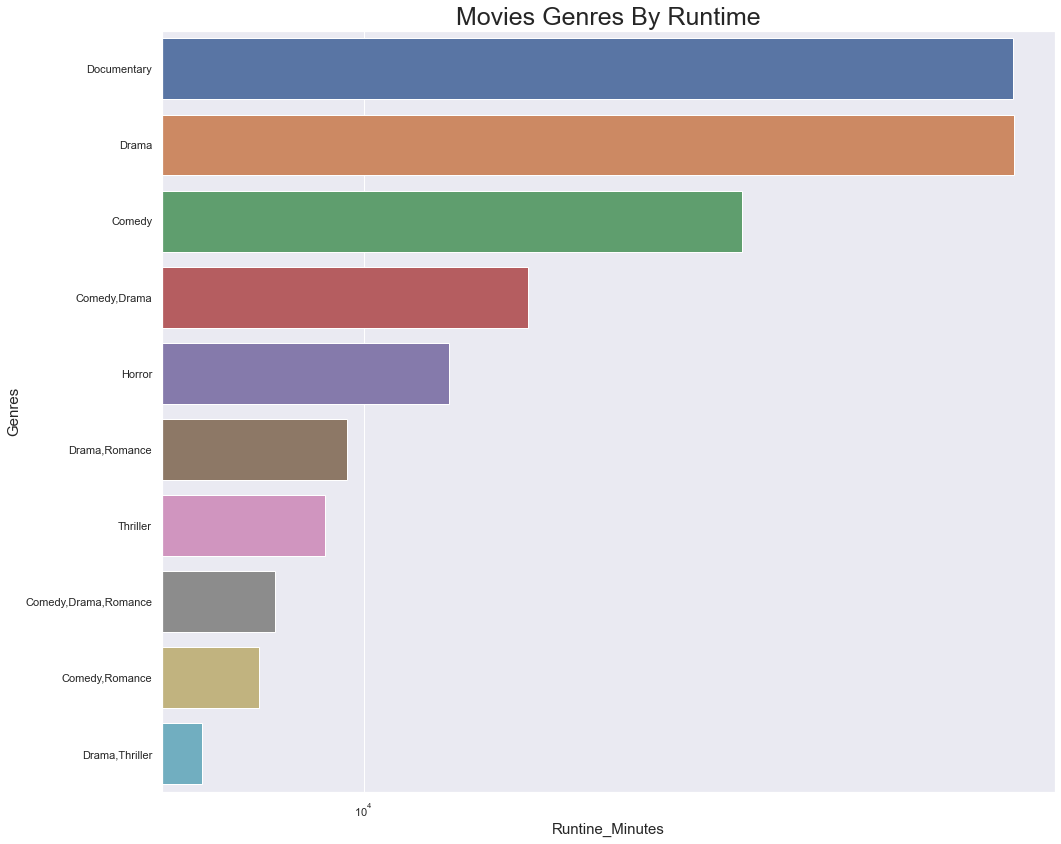

In [174]:
#Movies genres and there estimated runtime_minutes
fig,ax=plt.subplots(figsize=(16,14))
sns.barplot(data=Title_Vs_Runtime_Pivoted1,
            y=Title_Vs_Runtime_Pivoted1.index,
            x='averagerating',
            orient= 'h',
            order=Title_Vs_Runtime_Pivoted1.sort_values('runtime_minutes',ascending=False).index)
plt.xscale('log')
plt.title('Movies Genres By Runtime',fontsize=25)
plt.xlabel('Runtine_Minutes',fontsize=15)
plt.ylabel('Genres',fontsize=15);

Text(0, 0.5, 'Movies Aggregate')

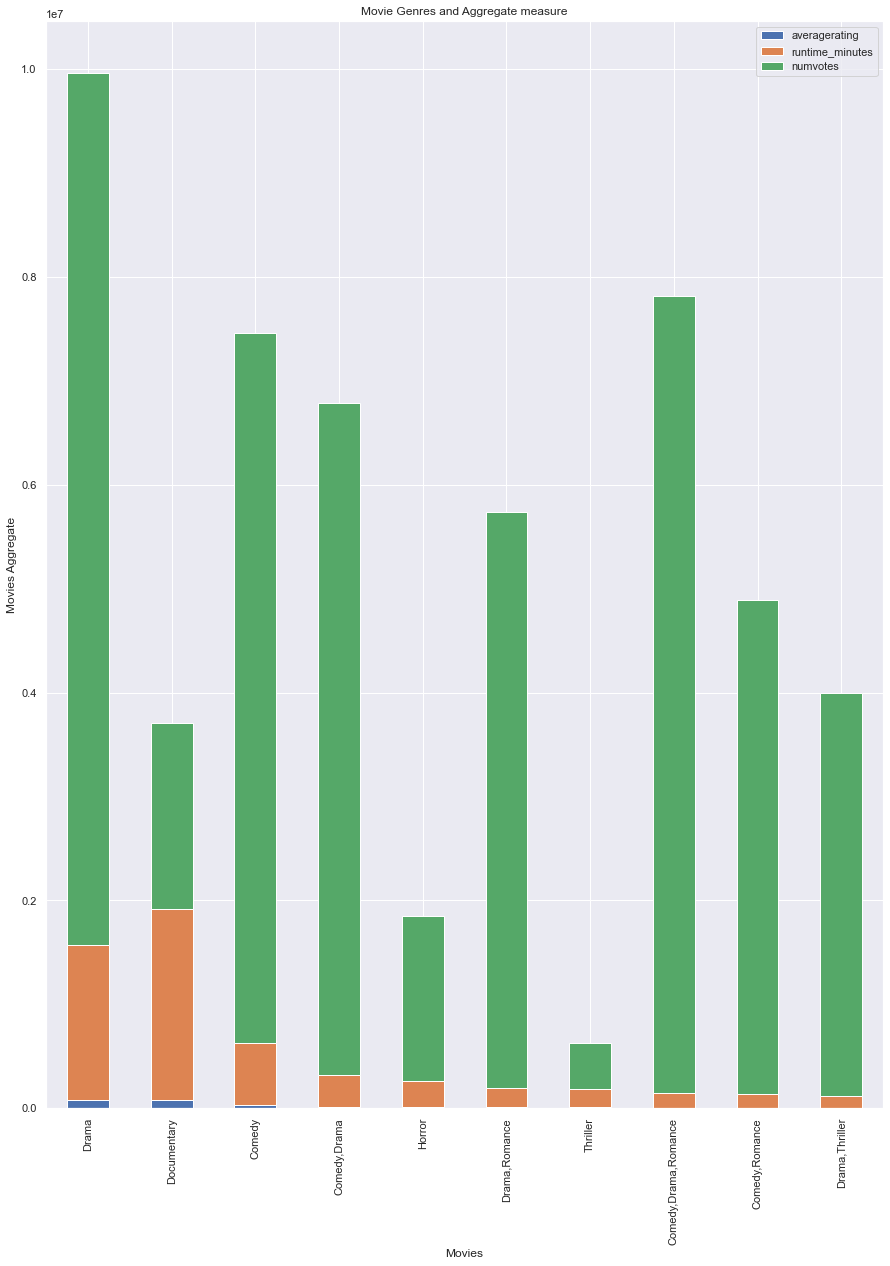

In [172]:
#Each movie against it aggregate.
Title_Vs_Runtime_Pivoted1.plot(kind = "bar", stacked = True,figsize = (15, 20))
plt.title("Movie Genres and Aggregate measure")
plt.xlabel("Movies")
plt.ylabel("Movies Aggregate")